In [51]:
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd
import itertools
import os.path
from os import path
import math
import xarray as xr
import glob


Text(0.01, 0.9, '$\\times$10$^{-2}$')

<Figure size 432x288 with 0 Axes>

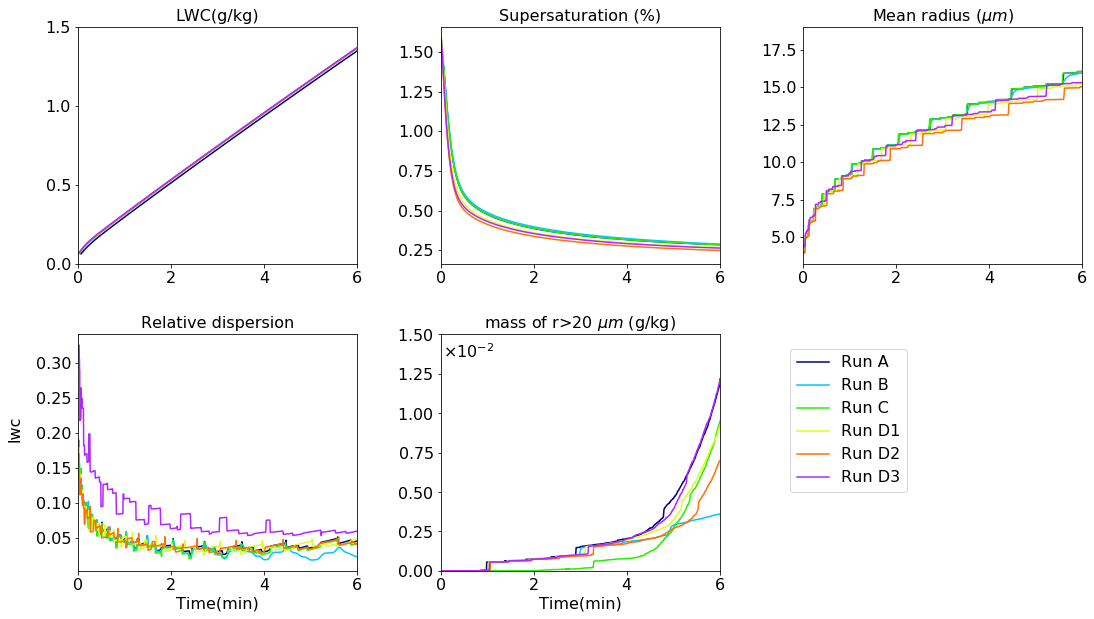

In [75]:
#plots from the ASCII files of DNS output
%matplotlib inline
#%matplotlib widget
seedcase=['5micron','gravity','no_solute','5micron_seed','double_seeding','GCCN']#,'gravity_seed','no_solute_seed']
figtag=['Run A','Run B','Run C','Run D1','Run D2','Run D3','Seed-NoTurb','Seed-NoSolu']
ncolor=7#len(N_seed)*len(r_seed)
#color_new = mpl.cm.get_cmap('jet', ncolor)
color_new=plt.cm.gist_ncar(np.linspace(0,1,ncolor))#gist_rainbow#brg
#color_new=plt.cm.jet(np.linspace(0,1,ncolor))#nipy_spectral
dir='/glade/u/home/sisichen/seeding_cases_link/cc_largedt/'

##supersat one colormap
plt.clf()
fig,ax=plt.subplots(2,3,figsize=(18, 10))
Ra=287
n=0
nature=['5micron','gravity','no_solute']
for (iseedcase,itag) in zip(seedcase,figtag):
    if str(iseedcase)in nature:
        nrad = [341,884,5285,6035, 6070,6079,6088,6091,6092,6093,6094]
        rad=[2.e-6,3.e-6,4.e-6,5.e-6,6.e-6,7.e-6,8.e-6,10.e-6,12.e-6,14.e-6,16.e-6]
    elif str(iseedcase)=='5micron_seed':
        nrad = [341,884,5285,6035, 6070,6079,6088,6091,6092,6093,6094,6796]
        rad=[2.e-6,3.e-6,4.e-6,5.e-6,6.e-6,7.e-6,8.e-6,10.e-6,12.e-6,14.e-6,16.e-6,4.e-6]
    elif str(iseedcase)=='double_seeding':
        nrad = [341,884,5285,6035, 6070,6079,6088,6091,6092,6093,6094,7498]
        rad=[2.e-6,3.e-6,4.e-6,5.e-6,6.e-6,7.e-6,8.e-6,10.e-6,12.e-6,14.e-6,16.e-6,4.e-6]
    elif str(iseedcase)=='GCCN':
        nrad = [341,884,5285,6035, 6070,6079,6088,6091,6092,6093,6094,6796]
        rad=[2.e-6,3.e-6,4.e-6,5.e-6,6.e-6,7.e-6,8.e-6,10.e-6,12.e-6,14.e-6,16.e-6,8.e-6]
    volume=np.power(rad,3)
    lwc0=np.dot(nrad,volume)
    lwc0=lwc0*4./3.*math.pi*1.e3/.165**3
    meanfile=dir+str(iseedcase)+'/RUN06262018.nc'
    dsdfile=dir+str(iseedcase)+'/RUN06262018.dsd'
    figlabel=str(itag)
    if path.exists(meanfile):
        ds_mean=pd.read_csv(meanfile,sep='\s+',index_col=False, header = None, names=\
            ['time','Sp','pp','temp0','thetapp','qvpp','lwc','qvs','rmth','r10'])  
        ds_dsd=pd.read_csv(dsdfile,sep='\s+',index_col=False, header=None)
        rhoa=ds_mean.pp/ds_mean.temp0/(Ra*(1+18/29*ds_mean.qvpp))
        
        nrad=ds_dsd.iloc[:,1:]
        ntot=nrad.sum(axis=1)
        time1=ds_dsd.iloc[:,0]
        rad=np.linspace(1., 100., num=100)
        dup_fact=np.ones((len(time1),1)) 
        rad=dup_fact*rad
        mean_R=np.multiply(rad,nrad)
        meantot_R=mean_R.sum(axis=1)
        meantot_R=np.array(meantot_R)
        meantot_R.shape=[len(meantot_R),1]
        ntot=np.array(ntot)
        ntot.shape=[len(ntot),1]
        mean_R=meantot_R/ntot
        
        sum_R2=np.sum((rad-mean_R)**2*nrad,axis=1)
        sum_R2=np.array(sum_R2)
        sum_R2.shape=[len(sum_R2),1]
        sd_R=np.sqrt(sum_R2/ntot)
        disp_R=sd_R/mean_R
        nrad19=nrad.iloc[:,19:]
        r19=nrad19*(rad[:,19:]/1e6)**3 #m^3
        nrad20=nrad.iloc[:,20:]
        r20=nrad20*(rad[:,20:]/1e6)**3 #m^3
        nrad21=nrad.iloc[:,21:]
        r21=nrad21*(rad[:,21:]/1e6)**3 #m^3
        nrad22=nrad.iloc[:,22:]
        r22=nrad22*(rad[:,22:]/1e6)**3 #m^3
        auto_mass19=r19.sum(axis=1)*4./3.*math.pi*1e6/.165**3#in gram/kg
        auto_mass20=r20.sum(axis=1)*4./3.*math.pi*1e6/.165**3#in gram/kg
        auto_mass21=r21.sum(axis=1)*4./3.*math.pi*1e6/.165**3#in gram/kg
        auto_mass22=r22.sum(axis=1)*4./3.*math.pi*1e6/.165**3#in gram/kg
        
        ds_mean=ds_mean.dropna(thresh=2) #drop N/A
        temp0=ds_mean.temp0
        pp=ds_mean.pp
        qv=ds_mean.qvpp
        Sp=ds_mean.Sp
        Spmax_loc=ds_mean.idxmax().Sp
        Spmin_loc=ds_mean.idxmin().Sp
        lwc=ds_mean.lwc
        qvs=ds_mean.qvs
        time=ds_mean.time
        time_spmax=time[Spmax_loc]
        time_spmin=time[Spmin_loc]
        figlabel=str(itag)
        lwc1=(qv[0]-qv+lwc0)*1e3
        #volume=.165**3
        #mean_R1=lwc1/1e3*volume/(4/3*math.pi*1e3)
        #mean_R1tot=mean_R1
        #mean_R1=mean_R1tot[0::2]
        #mean_R1=np.array(mean_R1)
        #mean_R1.shape=[len(mean_R1),1]
        #mean_R1=mean_R1[:min(len(mean_R1),len(time1))]/ntot[:min(len(mean_R1),len(time1))]
        #mean_R1=mean_R1**(1./3.)*1e6
        ax[0,0].plot(time/60, lwc1,label=figlabel,color=color_new[n])
        ax[0,1].plot(time/60, Sp*100, color=color_new[n])
        ax[0,2].plot(time1/60, mean_R, color=color_new[n])
        ax[1,0].plot(time1/60, disp_R, color=color_new[n])#mean radius not volume mean radius
        #ax[1,1].plot(time1[:min(len(mean_R1),len(time1))]/60, mean_R1, color=color_new[n])#mean r based on LWC
        #ax[1,0].plot(time1/60,auto_mass19*1e3,color=color_new[n])
        ax[1,1].plot(time1/60,auto_mass20,color=color_new[n])
        #ax[1,2].plot(time1/60,auto_mass21*1e3,color=color_new[n])
        #ax[1,3].plot(time1/60,auto_mass22*1e3,color=color_new[n])
        n=n+1
ax[0,0].legend(loc='lower right',bbox_to_anchor=(3, -1))
SMALL_SIZE = 16
OTHER_SIZE = 12
n_ax=range(2)
n_ay=range(3)
for (i,j) in itertools.product(n_ax,n_ay):
    ax[i,j].set_xlim(0,6)
for i in n_ay:
    ax[1,i].set_xlabel('Time(min)')
#ax.set_ylim(0,1)
#ax[0,0].set_xlim(0,6)
#ax.set_xlabel('Time(min)')
ax[0,0].set_ylim(0,1.5)
ax[1,1].set_ylim(0,0.015)
ax[0,0].set_title('LWC(g/kg)')
ax[0,1].set_title('Supersaturation (%)')
ax[0,2].set_title('Mean radius ($\mu m$)')
ax[1,0].set_title('Relative dispersion')
#ax[1,0].set_title('mass of r>19 $\mu m$ (g/kg)')
ax[1,1].set_title('mass of r>20 $\mu m$ (g/kg)')
#ax[1,2].set_title('mass of r>21 $\mu m$ (g/kg)')
#ax[1,3].set_title('mass of r>22 $\mu m$ (g/kg)')

ax[1,2].set_visible(False)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)   
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)   
plt.rc('legend', fontsize=SMALL_SIZE)
#figname='mean_Ss.png'
#fig.savefig(figname)
ax[0,0].set_ylabel('lwc')
ax[0,0].yaxis.set_label_coords(-0.2,-0.7)
ax[0,0].set_yticks([0,0.5,1,1.5])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

ax[1,1].ticklabel_format(useMathText=True,useOffset=False,axis='y', style='sci', scilimits=(-5,-3))
ax[1,1].get_yaxis().get_offset_text().set_visible(False)
ax_max = max(ax[1,1].get_yticks())
exponent_axis = np.floor(np.log10(ax_max)).astype(int)
ax[1,1].annotate(r'$\times$10$^{%i}$'%(exponent_axis),
             xy=(.01, .9), xycoords='axes fraction')